In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\aaron\OneDrive\Desktop\Health Insurance Analysis'

In [4]:
# installing dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'updated_region.csv'), index_col = False)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,West,16884.92
1,18,male,33.8,1,no,South,1725.55
2,28,male,33.0,3,no,South,4449.46
3,33,male,22.7,0,no,Midwest,21984.47
4,32,male,28.9,0,no,Midwest,3866.86


In [6]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
# dropping 3 columns because they are categorical variables. (sex, smoker, and region)
df2 = df.drop(columns =['sex', 'smoker', 'region']) 

In [8]:
df2.head()

,age,bmi,children,charges
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


the elbow technique 

# Scaling the data, since the charges column can dominate the clustering process. using Standardization (Z-score normalization), which transforms the data so that each feature has a mean of 0 and a standard deviation of 1. This helps give each feature an equal footing in the distance calculations.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# Standardizing the numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)

In [12]:
# Convert the scaled numpy array back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df2.columns)

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [31]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\aaron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\aaron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\aaron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\aaron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

[-5352.0,
 -4087.7364866910766,
 -3317.384640223284,
 -2572.1364949940867,
 -2208.3457866227677,
 -1983.5591755077335,
 -1835.542058596274,
 -1696.1564591634983,
 -1590.2251666717507]

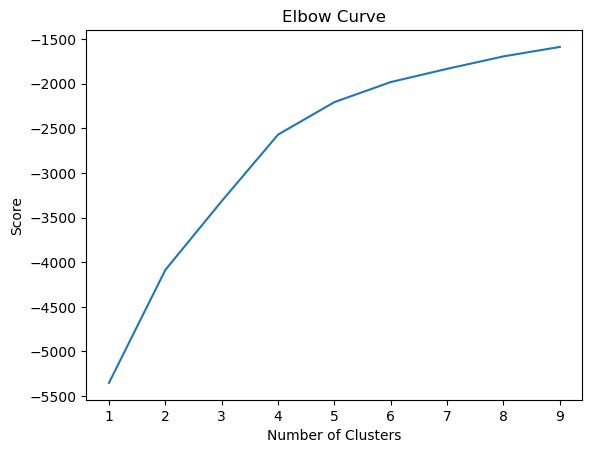

In [33]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

the optimal count for clusters is 4

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [39]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

C:\Users\aaron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4)

In [45]:
df2['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\aaron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [49]:
df2.head()

,age,bmi,children,charges,clusters
0,19,27.9,0,16884.92,3
1,18,33.8,1,1725.55,3
2,28,33.0,3,4449.46,1
3,33,22.7,0,21984.47,3
4,32,28.9,0,3866.86,3


In [53]:
df2['clusters'].value_counts()

clusters
3    419
0    408
1    347
2    164
Name: count, dtype: int64

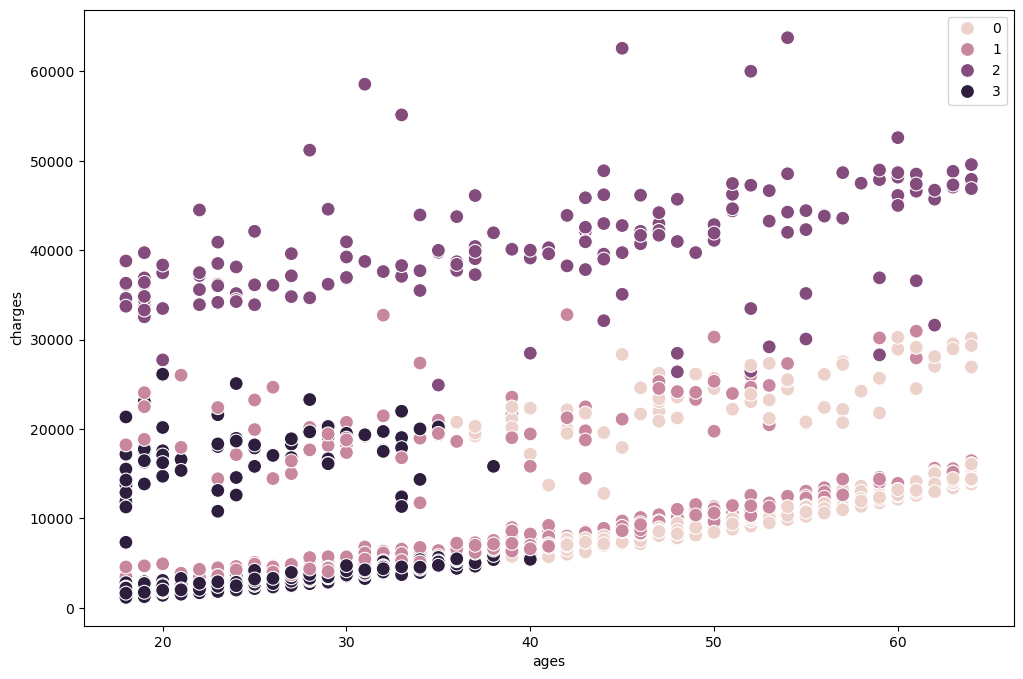

In [59]:
# Plot the clusters for the "charges" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['age'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ages') # Label x-axis.
plt.ylabel('charges') # Label y-axis.
plt.show()

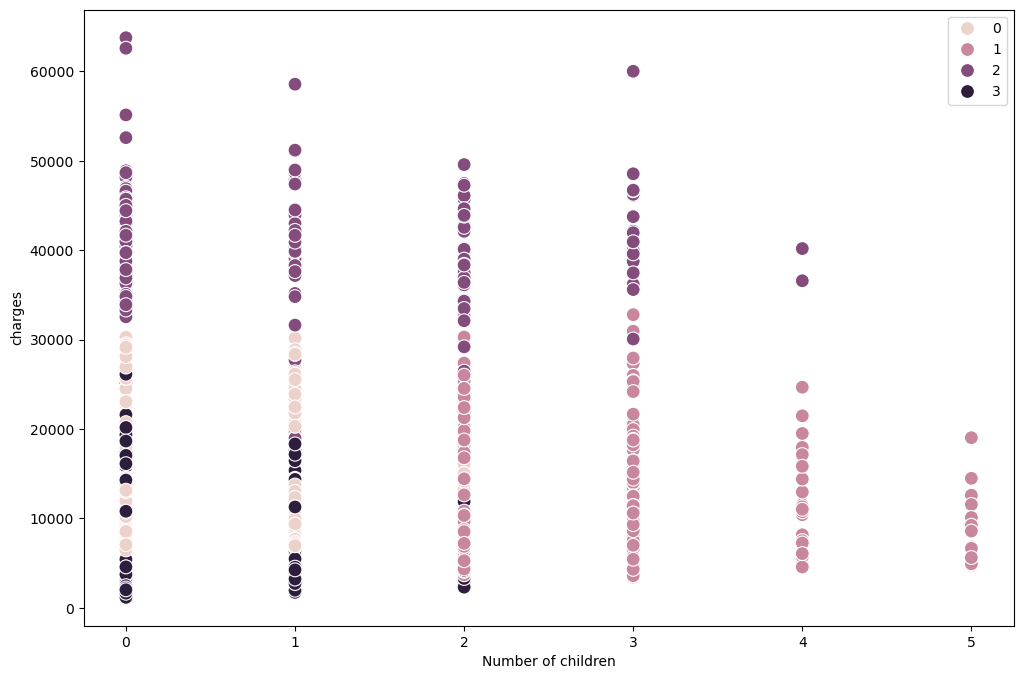

In [65]:
# Plot the clusters for the "charges" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['children'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of children') # Label x-axis.
plt.ylabel('charges') # Label y-axis.
plt.show()

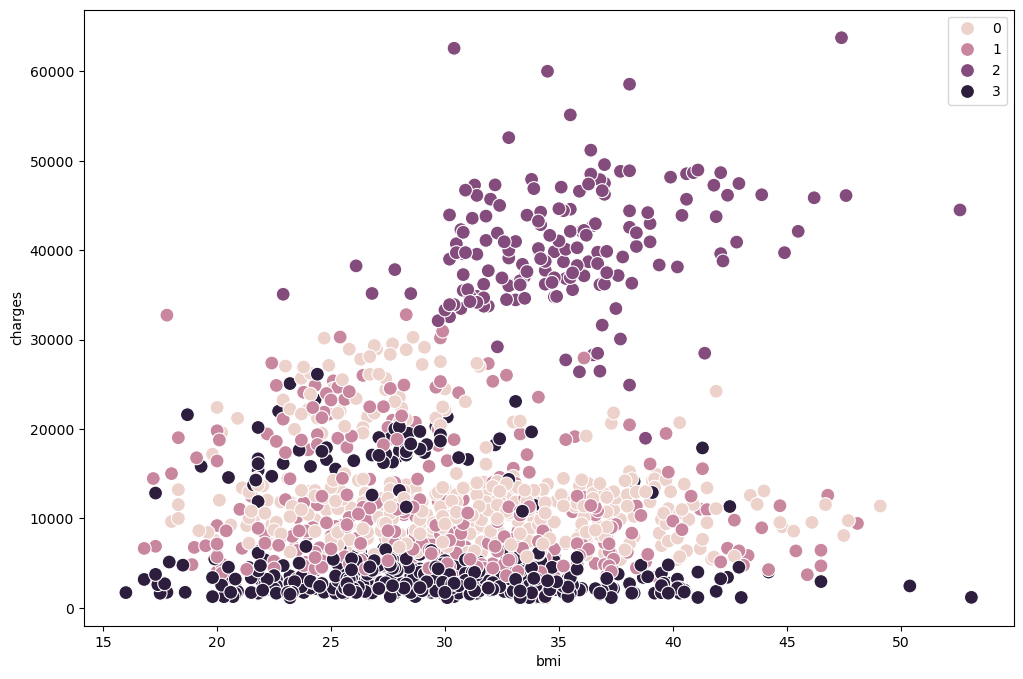

In [71]:
# Plot the clusters for the "charges" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['bmi'], y=df2['charges'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('bmi') # Label x-axis.
plt.ylabel('charges') # Label y-axis.
plt.show(1)

In [89]:
df2.loc[df2['clusters'] == 2, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'pink'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'soft pink'
df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'

In [103]:
df2.groupby('cluster').agg({'charges':['mean', 'median'], 
                         'bmi':['mean', 'median'], 
                         'age':['mean', 'median'],
                          'children':['mean', 'median']})

charges                   bmi               age         \
                     mean     median       mean median       mean median   
cluster                                                                    
dark purple   5397.382649   3227.120  29.156325  28.80  25.381862   24.0   
pink         10753.726167   8603.820  29.970893  29.70  39.884726   40.0   
purple       40395.450488  39805.400  35.322561  35.05  39.987805   41.0   
soft pink    12592.952990  11349.375  30.927206  30.40  52.514706   53.0   

             children         
                 mean median  
cluster                       
dark purple  0.412888    0.0  
pink         2.682997    3.0  
purple       1.140244    1.0  
soft pink    0.426471    0.0

# Observations:
# Charges:
Purple has the highest mean and median for charges, which suggests that people in this cluster are spending significantly more than those in the other clusters.
Dark purple has the lowest values, indicating lower charges.
    
# BMI:
The mean BMI is quite similar across all clusters (ranging from 29.16 to 35.32), though Purple has a slightly higher mean BMI than the others.

# Age:
The average age seems to increase as you go from dark purple (mean age 25.38) to soft pink (mean age 52.51), which could indicate that older individuals are more likely to be in the soft pink cluster, while younger individuals are in the dark purple cluster.

# Children:
Dark purple and soft pink clusters have lower average numbers of children (around 0.41 and 0.43), whereas the pink cluster has a higher number of children (2.68).

# What this tells me:

* The "purple" cluster is characterized by high charges and older people, potentially indicating individuals with higher health costs.

* The "dark purple" cluster is likely made up of younger individuals with fewer charges and lower BMI.

* The "pink" cluster has a higher number of children, and individuals in this cluster may have moderate charges and BMI.

* The "soft pink" cluster is likely made up of older individuals with high charges.